In [2]:
import pandas as pd
import numpy as np

In [3]:
customers = pd.read_csv('Downloads/dim_customers.csv')
retail = pd.read_csv('Downloads/retail_2016_2017.csv')
oil = pd.read_csv('Downloads/oil.csv',parse_dates = ['date'])
transactions = pd.read_csv('Downloads/transactions.csv',parse_dates = ['date'])
premier_league = pd.read_excel('Downloads/premier_league_games_full.xlsx')

In [4]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

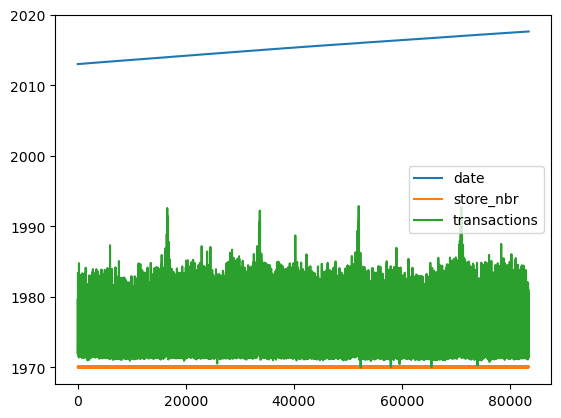

In [5]:
transactions.plot()

<Axes: xlabel='date'>

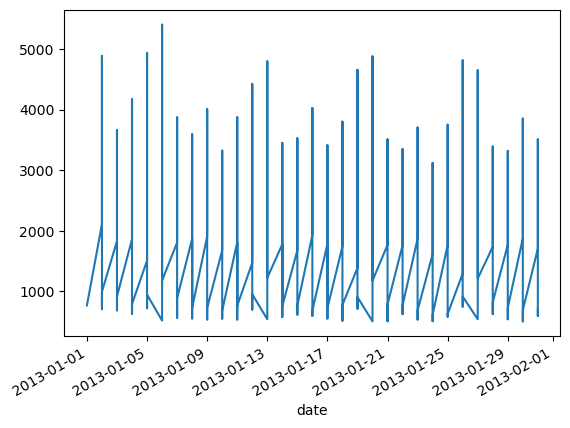

In [6]:
transactions.set_index('date').loc["2013-01",'transactions'].plot()

In [7]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


<Axes: xlabel='date'>

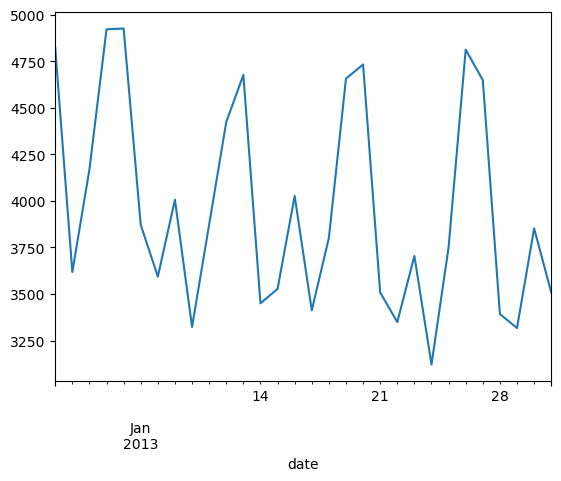

In [8]:
transactions.query("store_nbr == 44").set_index('date').loc['2013-01','transactions'].plot()

<Axes: xlabel='date'>

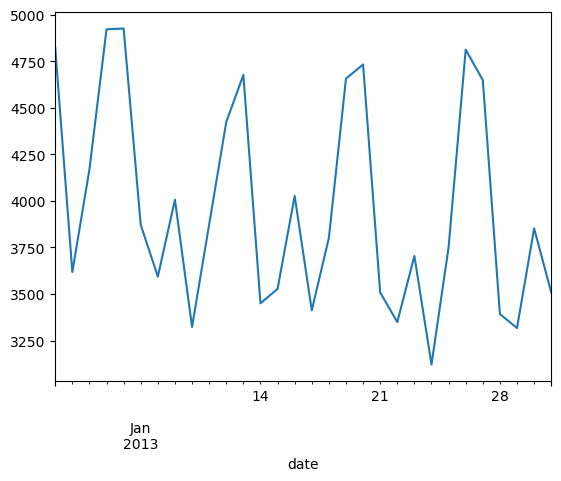

In [9]:
#or we can do it like that
transactions_44 = transactions.loc[transactions['store_nbr']==44,['date','transactions']]
transactions_44.set_index('date').loc['2013-01','transactions'].plot()

<Axes: xlabel='date'>

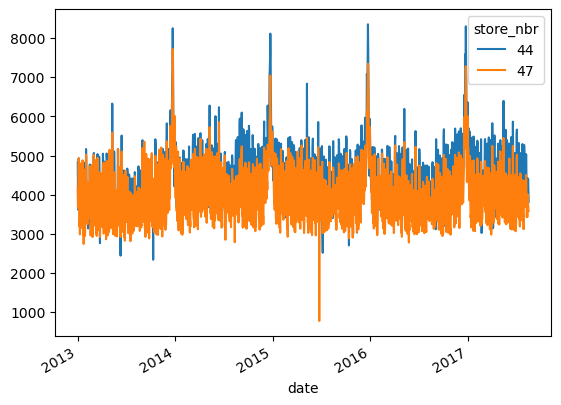

In [10]:
#plotting multiple values
(transactions
  .query('store_nbr in [44,47]')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)\
  .plot()
)

<Axes: title={'center': 'store_44_transactions 2013-2014'}, xlabel='Years', ylabel='Transactions'>

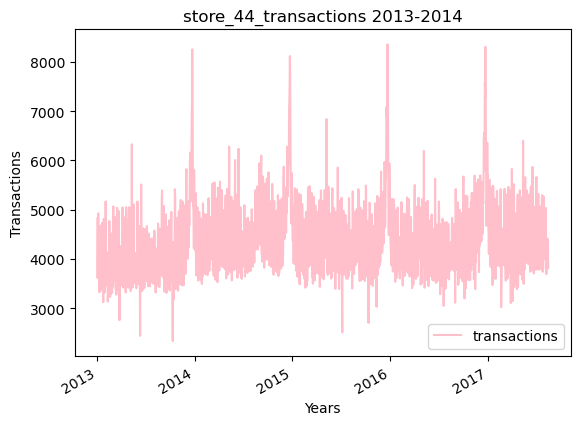

In [11]:
#color using color name
transactions_44.set_index('date').plot(
   title = 'store_44_transactions 2013-2014',
   xlabel = 'Years',
   ylabel = 'Transactions',
   color = 'pink')

<Axes: title={'center': 'store_44_transactions 2013-2014'}, xlabel='Years', ylabel='Transactions'>

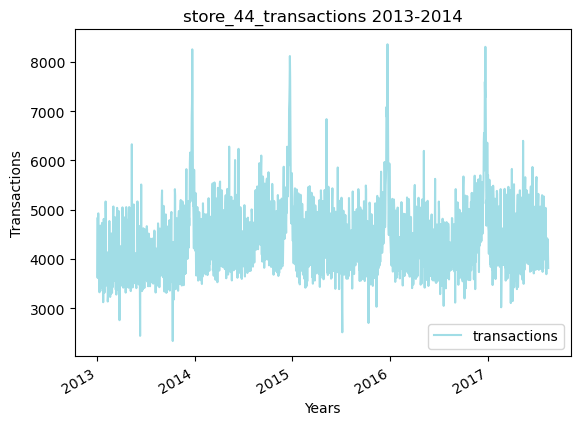

In [12]:
#color using hexcolor picker
transactions_44.set_index('date').plot(
   title = 'store_44_transactions 2013-2014',
   xlabel = 'Years',
   ylabel = 'Transactions',
   color = '#a1dde6')

<Axes: xlabel='date'>

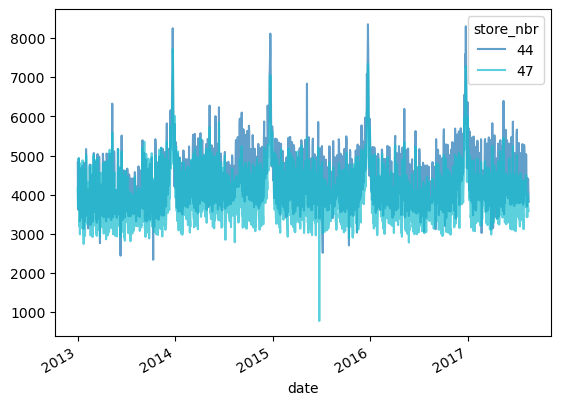

In [13]:
#color maps
(transactions
  .query('store_nbr in [44,47]')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)\
  .plot(#color = ['#b460f0','#d6594d'],
       cmap = 'tab10',
      alpha=.7
))

<Axes: xlabel='date'>

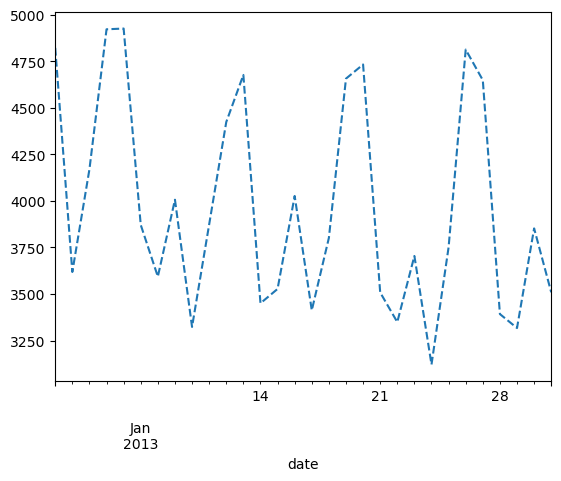

In [14]:
#Line style
transactions_44.set_index('date').loc['2013-01','transactions'].plot(style = ['--'])

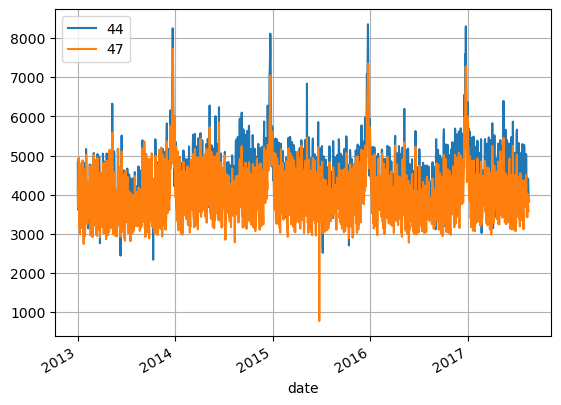

In [15]:
#chart legend and gridding
(transactions
  .query('store_nbr in [44,47]')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)\
  .plot(grid=True)
).legend(loc='upper left')

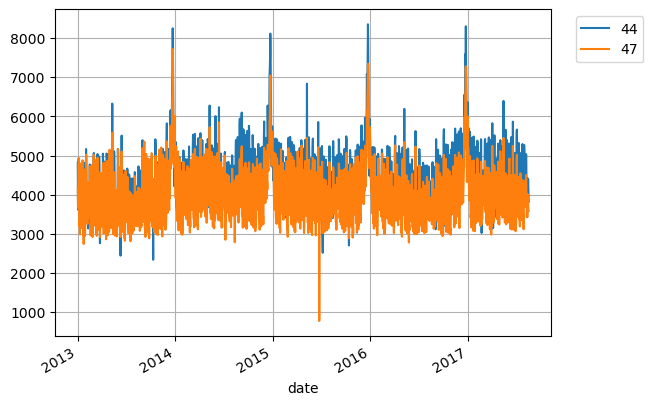

In [16]:
#using the bbox method to manualy set the location of legend
(transactions
  .query('store_nbr in [44,47]')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)\
  .plot(grid=True)
).legend(bbox_to_anchor=(1.2,1))

In [17]:
import seaborn as sns

sns.set_style('darkgrid')

<Axes: title={'center': 'store_44_and 47 transactions 2014'}, xlabel='Years', ylabel='Transactions'>

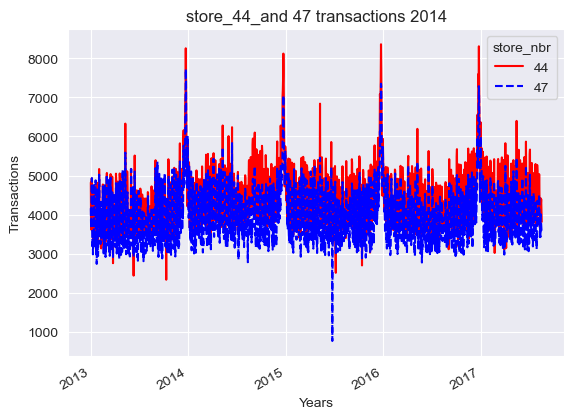

In [18]:
(transactions
  .query('store_nbr in [44,47]')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)
  .plot(title = 'store_44_and 47 transactions 2014',
   xlabel = 'Years',
   ylabel = 'Transactions',
   color = ['red','blue'],
   style= ['-','--'],
   grid=True)
)

In [19]:
import matplotlib as mp

mp.style.use('fivethirtyeight')



<Axes: title={'center': 'store_44_and 47 transactions 2014'}, xlabel='Years', ylabel='Transactions'>

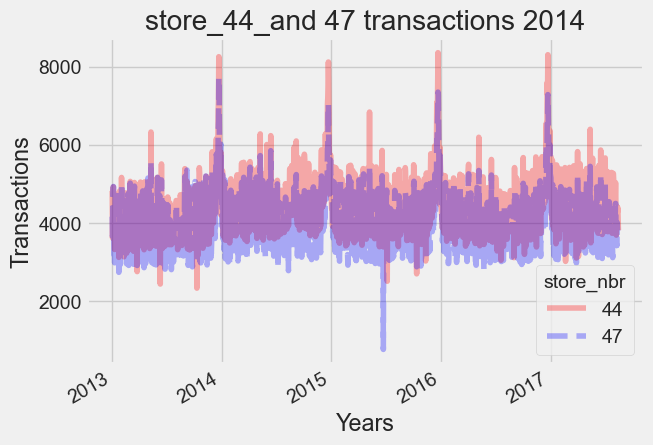

In [20]:
(transactions
  .query('store_nbr in [44,47]')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)
  .plot(title = 'store_44_and 47 transactions 2014',
   xlabel = 'Years',
   ylabel = 'Transactions',
   color = ['red','blue'],
   alpha=.3,
   style= ['-','--'],
   grid=True)
)

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

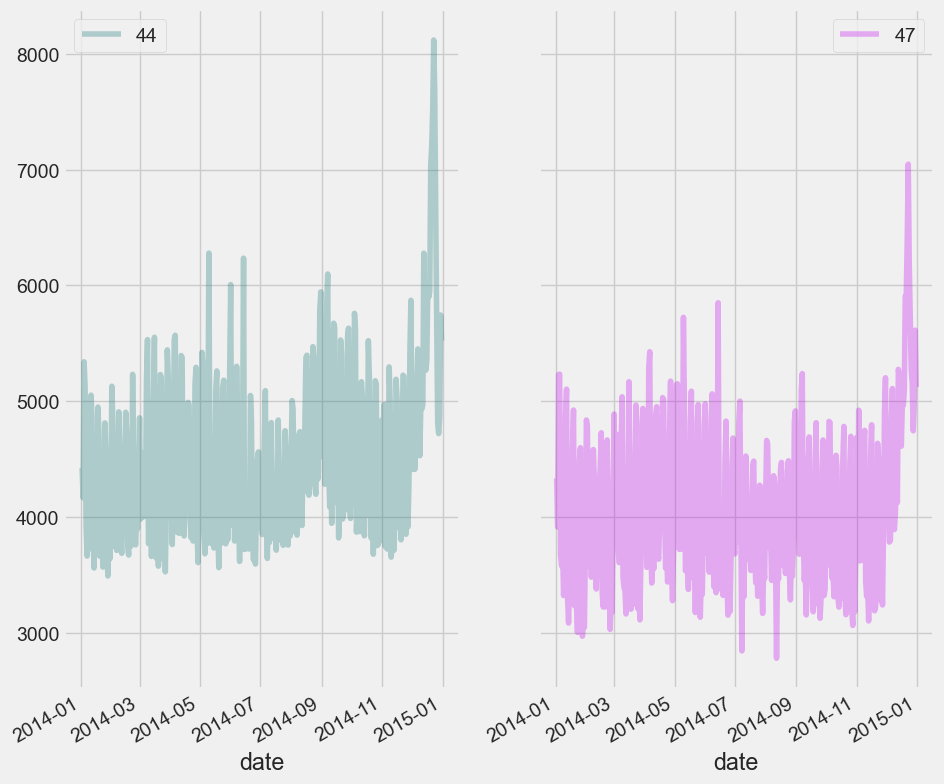

In [21]:
#subplots
#layout can be used to change the layout by default it is (2,1) bur we can change it in (1,2)
#sharey helps us to differnetiate between two data more precisely so we generally used this with layout(1,2)
#figsize use to change the dimension
(transactions
  .query('store_nbr in [44,47] and date.dt.year==2014')
  .pivot_table(index='date',columns='store_nbr')
  .droplevel(0,axis=1)\
  .plot(grid=True,
       subplots = True,
       alpha=.3,
       color = ['#187878','#c507f0'],
       layout = (1,2),
       sharey = True,
       figsize = (10,10)))

In [22]:
#Bar Charts
(transactions.query('store_nbr in [1,2,3,4]').groupby(['store_nbr']).agg({'transactions':'sum'})
 .sort_values('transactions',ascending=False))
 #.plot.bar(rot=45))

,transactions
store_nbr,
3,5366350
2,3219901
1,2553963
4,2519007


<Axes: ylabel='store_nbr'>

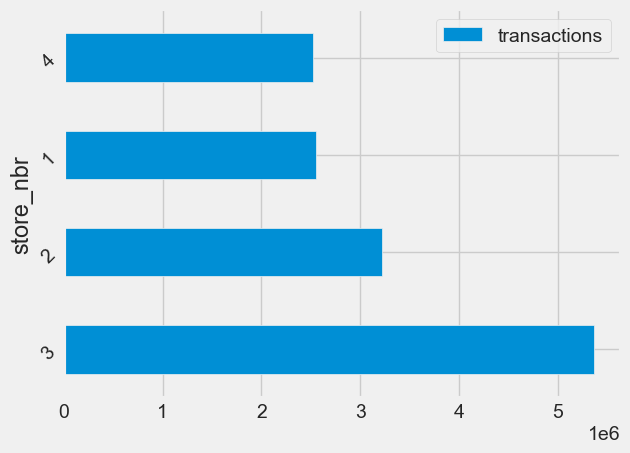

In [23]:
(transactions.query('store_nbr in [1,2,3,4]').groupby(['store_nbr']).agg({'transactions':'sum'})
 .sort_values('transactions',ascending=False)
 .plot.barh(rot=45))

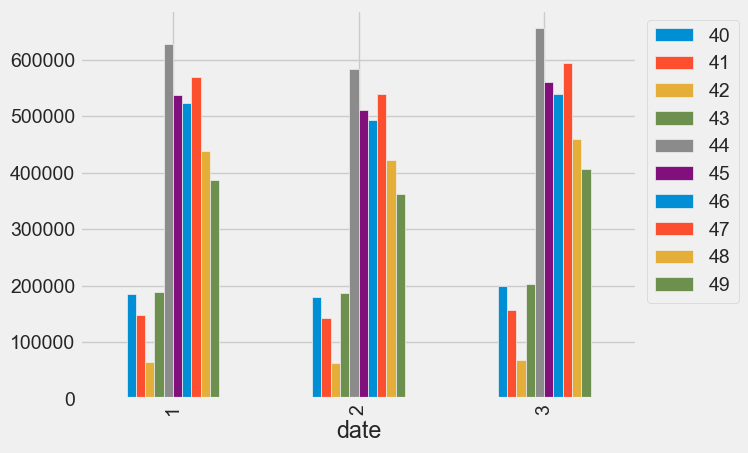

In [24]:
#grouped bar charts
store_40s = list(range(40,50))
(transactions.query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
 .pivot_table(index= transactions['date'].dt.month,
             columns = transactions['store_nbr'],
             values = 'transactions',
             aggfunc='sum')
 .plot.bar().legend(bbox_to_anchor = (1.2,1)))

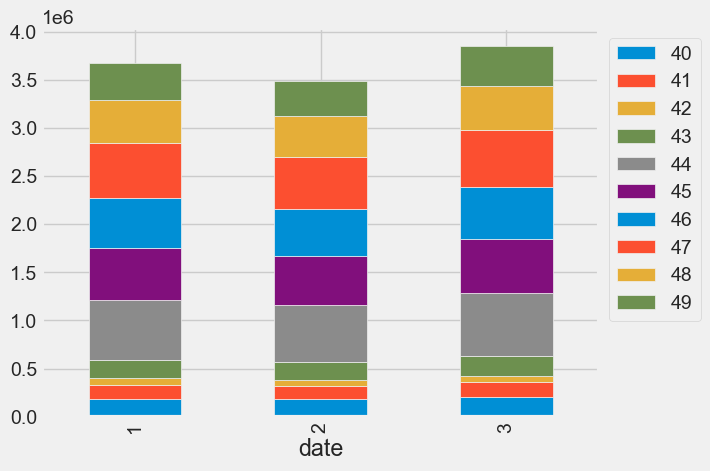

In [25]:
#stacked bar charts
store_40s = list(range(40,50))
(transactions.query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
 .pivot_table(index= transactions['date'].dt.month,
             columns = transactions['store_nbr'],
             values = 'transactions',
             aggfunc='sum')
 .plot.bar(stacked = True).legend(bbox_to_anchor = (1.2,1)))

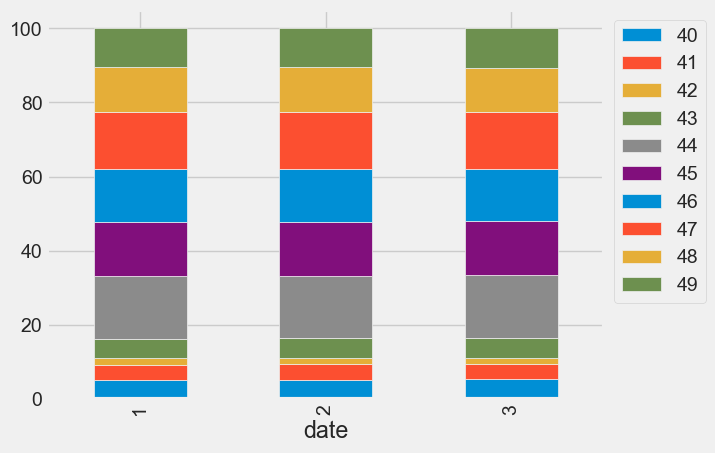

In [26]:
#100% stacked bar charts
#stacked bar charts
store_40s = list(range(40,50))
(transactions.query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
 .pivot_table(index= transactions['date'].dt.month,
             columns = transactions['store_nbr'],
             values = 'transactions',
             aggfunc='sum').apply(lambda x: x*100/sum(x),axis = 1)
 .plot.bar(stacked = True).legend(bbox_to_anchor = (1.2,1)))

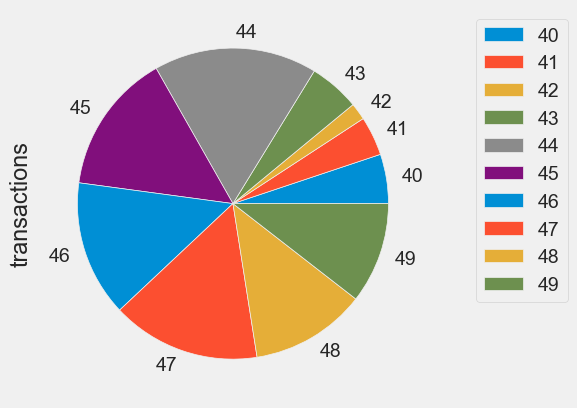

In [36]:
#pie charts
(transactions.query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
 .groupby('store_nbr')
 .agg({'transactions':'sum'})
 .plot.pie(y='transactions')
).legend(bbox_to_anchor=(1.1,1))

<Axes: xlabel='44', ylabel='47'>

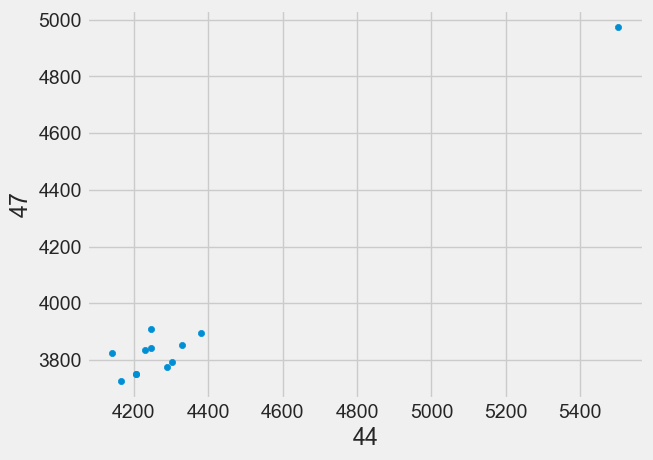

In [59]:
#scatter plot
(transactions.query('store_nbr in @store_40s')
  .pivot_table(index=transactions['date'].dt.month,
              columns='store_nbr',
              values='transactions'
              )).plot.scatter(x=44,y=47)

<Axes: ylabel='Frequency'>

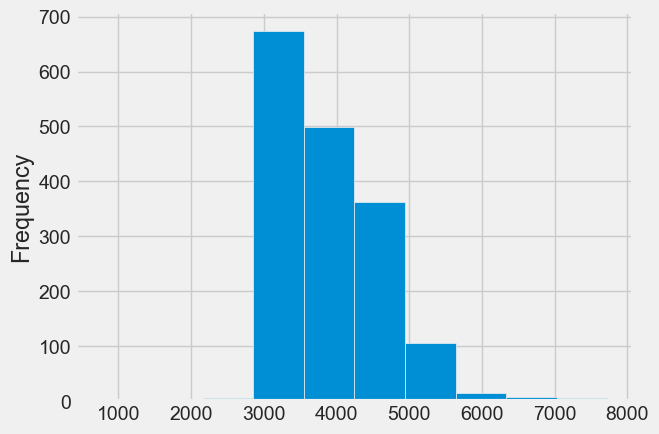

In [71]:
transactions.loc[transactions['store_nbr']==47,'transactions'].plot.hist()

<Axes: ylabel='Frequency'>

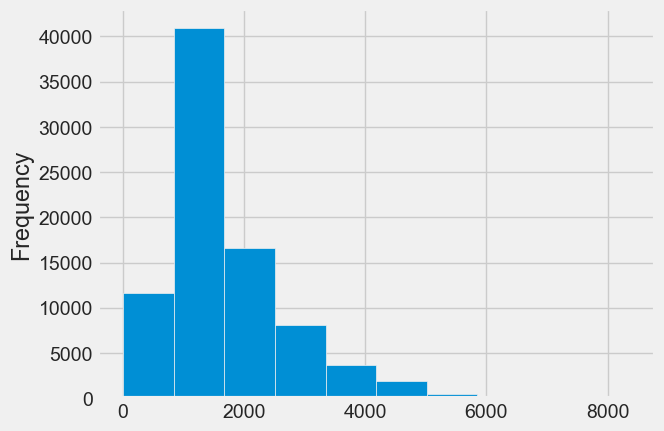

In [72]:
transactions['transactions'].plot.hist()

<Axes: ylabel='Frequency'>

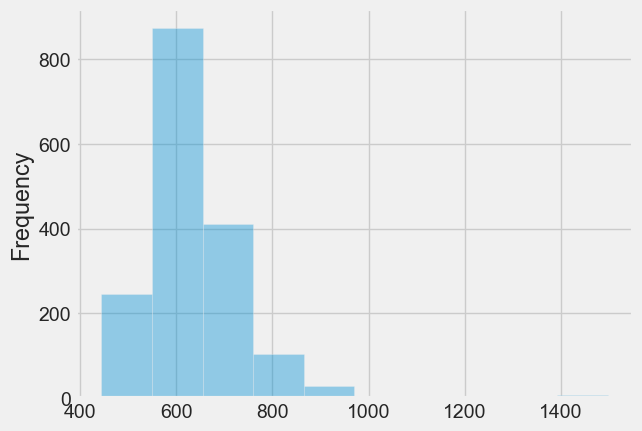

In [77]:
transactions.loc[transactions['store_nbr']==47&48,'transactions'].plot.hist(alpha=0.4)

In [78]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
